# Assessing Financial Inclusion in High-Income & Developing Countries 

## Preprocessing Global Findex Dataset

In [1]:
# Import all necessary libraries and dependencies

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [2]:
micro_world = pd.read_csv(r'C:\Users\yaksh\OneDrive\GA_DataScience_Course\Final_Project_YB\emkts_credit_scoring\micro_world.csv', encoding='ISO-8859-1')

In [3]:
micro_world.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,...,4,4,4,4.0,4,5.0,1,2,0,0.0
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,...,4,4,4,4.0,4,5.0,1,2,0,0.0
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,...,4,4,4,4.0,4,5.0,1,2,0,0.0
3,Afghanistan,AFG,South Asia,22647496.0,170778240,2.572345,1,40.0,1,4,...,4,4,4,4.0,4,5.0,2,2,0,0.0
4,Afghanistan,AFG,South Asia,22647496.0,170712642,0.525471,2,27.0,3,1,...,1,4,4,4.0,4,5.0,1,1,1,0.0


In [4]:
micro_world.shape

(127854, 127)

In [5]:
# Check data types
micro_world.info

<bound method DataFrame.info of             economy economycode                                    regionwb  \
0       Afghanistan         AFG                                  South Asia   
1       Afghanistan         AFG                                  South Asia   
2       Afghanistan         AFG                                  South Asia   
3       Afghanistan         AFG                                  South Asia   
4       Afghanistan         AFG                                  South Asia   
...             ...         ...                                         ...   
127849     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
127850     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
127851     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
127852     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   
127853     Zimbabwe         ZWE  Sub-Saharan Africa (excluding high income)   

         pop_adult 

In [6]:
# Check all unique values
micro_world.nunique()

economy               123
economycode           123
regionwb                7
pop_adult             123
wpid_random        127854
                    ...  
remittances             6
mobileowner             4
internetaccess          4
anydigpayment           2
merchantpay_dig         2
Length: 127, dtype: int64

### Determine Frequency of Select Columns

In [7]:
micro_world.regionwb.value_counts()

High income                                           40635
Sub-Saharan Africa (excluding high income)            25037
Europe & Central Asia (excluding high income)         18022
Latin America & Caribbean (excluding high income)     14519
East Asia & Pacific (excluding high income)           11579
Middle East & North Africa (excluding high income)     9053
South Asia                                             8009
Name: regionwb, dtype: int64

In [8]:
micro_world.economy.value_counts()

China                 3500
India                 3000
Russian Federation    2011
Indonesia             1062
Lebanon               1022
                      ... 
Mali                  1000
Malaysia              1000
Zimbabwe              1000
Iceland                502
Jamaica                502
Name: economy, Length: 123, dtype: int64

In [9]:
micro_world.isnull().sum()

economy                0
economycode            0
regionwb            1000
pop_adult              0
wpid_random            0
                   ...  
remittances        29606
mobileowner            0
internetaccess         0
anydigpayment          0
merchantpay_dig    29606
Length: 127, dtype: int64

### Cleaning the Findex Dataset

In [10]:
# Modify ages to be filled with median values - Age is not determined to be a feature column for the model evaluation
micro_world.age.fillna(micro_world.age.median(), inplace=True)

In [11]:
# Remove any rows with NA values from Regionwb
micro_world.dropna(subset=['regionwb'], inplace=True)

In [12]:
micro_world.shape

(126854, 127)

In [13]:
micro_world.educ.unique()

array([2, 1, 3, 5, 4], dtype=int64)

<Axes: >

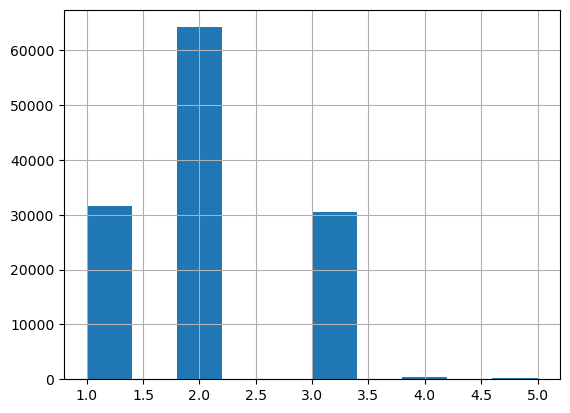

In [14]:
micro_world['educ'].hist()

- Education column contains results '4' and '5', which are not found in the data dictionary. Remove rows with these instances to have an appropriate benchmark for comparison 

In [15]:
# Filter the data frame to keep only rows where 'educ' is 1, 2, or 3
micro_world = micro_world[micro_world['educ'].isin([1, 2, 3])]

In [16]:
micro_world.educ.unique()

array([2, 1, 3], dtype=int64)

## Retrieve and Combine the 2021 Global Multidimensional Poverty Index Data

Link to HD Report and HDI Dataset: https://hdr.undp.org/content/2021-global-multidimensional-poverty-index-mpi#/indicies/MPI

In [17]:
hdi_report = pd.read_csv(r'C:\Users\yaksh\OneDrive\GA_DataScience_Course\Final_Project_YB\emkts_credit_scoring\hdi_report_21.csv', encoding='ISO-8859-1')

In [18]:
hdi_report.head()

,economycode,economy,hdi_rank_2021,hdi_2020,hdi_2021
0,AFG,Afghanistan,180.0,0.483,0.478
1,AGO,Angola,148.0,0.590,0.586
2,ALB,Albania,67.0,0.794,0.796
3,AND,Andorra,40.0,0.848,0.858
4,ARE,United Arab Emirates,26.0,0.912,0.911


In [19]:
micro_world.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,...,4,4,4,4.0,4,5.0,1,2,0,0.0
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,...,4,4,4,4.0,4,5.0,1,2,0,0.0
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,...,4,4,4,4.0,4,5.0,1,2,0,0.0
3,Afghanistan,AFG,South Asia,22647496.0,170778240,2.572345,1,40.0,1,4,...,4,4,4,4.0,4,5.0,2,2,0,0.0
4,Afghanistan,AFG,South Asia,22647496.0,170712642,0.525471,2,27.0,3,1,...,1,4,4,4.0,4,5.0,1,1,1,0.0


In [20]:
# Create new variable for merged datasets on economycode
merged_data = pd.merge(micro_world, hdi_report, on="economycode", how="left")

In [21]:
merged_data.head()

,economy_x,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,economy_y,hdi_rank_2021,hdi_2020,hdi_2021
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
3,Afghanistan,AFG,South Asia,22647496.0,170778240,2.572345,1,40.0,1,4,...,4,5.0,2,2,0,0.0,Afghanistan,180.0,0.483,0.478
4,Afghanistan,AFG,South Asia,22647496.0,170712642,0.525471,2,27.0,3,1,...,4,5.0,1,1,1,0.0,Afghanistan,180.0,0.483,0.478


In [22]:
merged_data.shape

(126185, 131)

In [23]:
# Check merged data for any NA or null values 
merged_data.isnull().sum()

economy_x              0
economycode            0
regionwb               0
pop_adult              0
wpid_random            0
                   ...  
merchantpay_dig    28486
economy_y           1000
hdi_rank_2021       1000
hdi_2020            1000
hdi_2021            1000
Length: 131, dtype: int64

### Cleaning and Reformatting the Merged Dataset 

In [24]:
# Check for null values in the HDI column(s) of the merged dataset
merged_data[merged_data['economy_y'].isnull()]['economycode']

60367    XKX
60368    XKX
60369    XKX
60370    XKX
60371    XKX
        ... 
61362    XKX
61363    XKX
61364    XKX
61365    XKX
61366    XKX
Name: economycode, Length: 1000, dtype: object

HDI dataset does not contain any entries for Kosovo (Economy) - This column will need to be dropped 

In [25]:
merged_data.dropna(subset=['economy_y'], inplace=True)

In [26]:
merged_data.isnull().sum()

economy_x              0
economycode            0
regionwb               0
pop_adult              0
wpid_random            0
                   ...  
merchantpay_dig    28486
economy_y              0
hdi_rank_2021          0
hdi_2020               0
hdi_2021               0
Length: 131, dtype: int64

### Saving Processed Dataset into a new CSV file

In [27]:
merged_data.to_csv('incl_finance.csv', index=False)

In [28]:
merged_data.head()

,economy_x,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,economy_y,hdi_rank_2021,hdi_2020,hdi_2021
0,Afghanistan,AFG,South Asia,22647496.0,140343632,0.774286,1,19.0,2,4,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
1,Afghanistan,AFG,South Asia,22647496.0,167823412,0.766367,1,40.0,1,5,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
2,Afghanistan,AFG,South Asia,22647496.0,182483450,0.588983,1,25.0,1,1,...,4,5.0,1,2,0,0.0,Afghanistan,180.0,0.483,0.478
3,Afghanistan,AFG,South Asia,22647496.0,170778240,2.572345,1,40.0,1,4,...,4,5.0,2,2,0,0.0,Afghanistan,180.0,0.483,0.478
4,Afghanistan,AFG,South Asia,22647496.0,170712642,0.525471,2,27.0,3,1,...,4,5.0,1,1,1,0.0,Afghanistan,180.0,0.483,0.478


In [29]:
# Reload new CSV file - manual edits made to remove extraenous columns and columns with incomplete datasets that cannot be filled with NA values
incl_finance = pd.read_csv(r'C:\Users\yaksh\OneDrive\GA_DataScience_Course\Final_Project_YB\incl_finance_v2.csv', encoding='ISO-8859-1')

In [30]:
incl_finance.head()

,economy,economycode,regionwb,educ,inc_q,emp_in,urbanicity_f2f,account,account_fin,account_mob,...,fin43a,fin43b,fin43d,fin43e,fin44a,fin44b,fin44c,fin44d,fin45,fin45_1
0,Afghanistan,AFG,South Asia,2,4,2.0,1.0,0,0,0.0,...,NaN,NaN,NaN,NaN,3,2,2,1,2.0,2.0
1,Afghanistan,AFG,South Asia,1,5,2.0,1.0,0,0,0.0,...,NaN,NaN,NaN,NaN,2,1,1,1,2.0,1.0
2,Afghanistan,AFG,South Asia,1,1,2.0,2.0,0,0,0.0,...,NaN,NaN,NaN,NaN,1,1,1,1,2.0,1.0
3,Afghanistan,AFG,South Asia,1,4,2.0,2.0,0,0,0.0,...,NaN,NaN,NaN,NaN,3,3,2,2,4.0,3.0
4,Afghanistan,AFG,South Asia,3,1,1.0,1.0,1,1,0.0,...,NaN,NaN,NaN,NaN,1,1,2,2,2.0,1.0


In [31]:
incl_finance.shape

(125185, 122)

In [32]:
# We will remove China from the dataset since China's survey was different from the rest of the respondents
## China also has missing values for certain 
incl_finance = incl_finance[incl_finance['economy'] != 'China']

In [33]:
incl_finance.shape

(121703, 122)

In [34]:
incl_finance.economy.value_counts()

India                 2989
Russian Federation    2006
Indonesia             1062
Saudi Arabia          1019
Lebanon               1019
                      ... 
Liberia                977
Mozambique             952
Dominican Republic     952
Iceland                500
Jamaica                454
Name: economy, Length: 120, dtype: int64

## Define Feature Columns and Run Train-Test-Split 

### Step 1: Estimate Feature Importance for Model Selection

In [35]:
# Identifying feature columns to select
feature_cols = ['educ', 'emp_in', 'mobileowner','inc_q', 'saved', 'borrowed', 'receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities', 'internetaccess', 'hdi_rank_2021', 'hdi_2021']

X = incl_finance[feature_cols]
y = incl_finance['account']

In [36]:
# Instantiate random forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importances
importance = rf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'feature': feature_cols, 'importance': importance})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values('importance', ascending=False)

# Print the feature importances
print(importance_df)


              feature  importance
11      hdi_rank_2021    0.167699
9       pay_utilities    0.156274
12           hdi_2021    0.151657
6       receive_wages    0.135086
7   receive_transfers    0.075125
3               inc_q    0.072168
4               saved    0.047034
8     receive_pension    0.044881
0                educ    0.043100
10     internetaccess    0.041965
2         mobileowner    0.025179
1              emp_in    0.019943
5            borrowed    0.019888


From feature importance test, we can eliminate 'emp_in' and 'borrowed' as feature columns due to low importance scores

### Step 2: Select the Feature Columns for Model Ingestion

Select the predictor variables and target variable from the dataframe.

In [37]:
# Define predictors and target variable for account
feature_cols = ['educ', 'mobileowner','inc_q', 'saved', 'receive_wages', 'receive_transfers', 'receive_pension', 'pay_utilities', 'internetaccess', 'hdi_rank_2021', 'hdi_2021']

X = incl_finance[feature_cols]
y = incl_finance['account']

<Axes: >

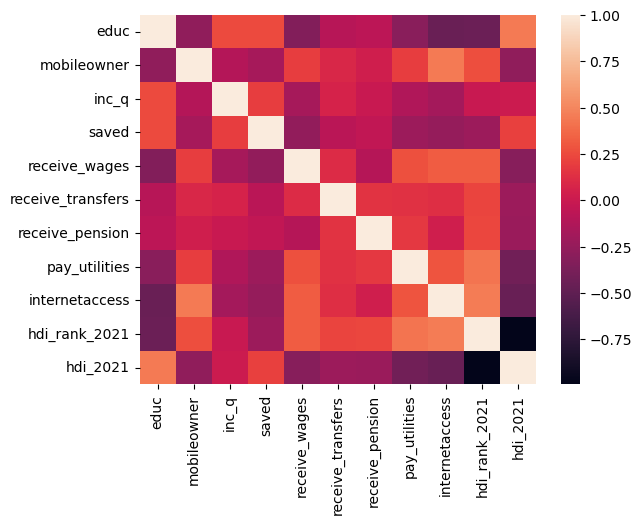

In [38]:
sns.heatmap(X.corr())

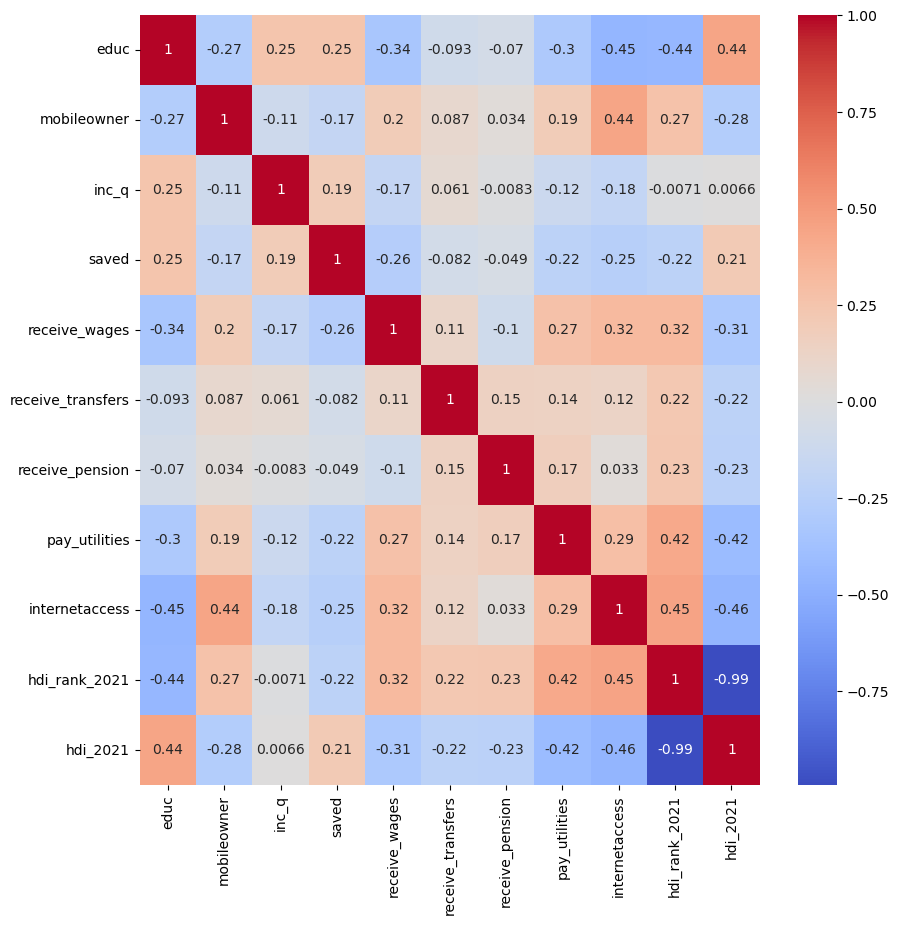

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

### Step 3: Split the Data

Split your data into training and test datasets. This will allow you to test the performance of your model on unseen data.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Instantiate Pipelines to Preprocess Ordinal and Continuous Variables

Apply necessary transformations before fitting the model to ensure consistency when dealing with Ordinal vs. Continuous variables

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Define the preprocessing steps for different types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), ['mobileowner', 'receive_wages', 'receive_transfers', 'receive_pension', 'saved', 'pay_utilities', 'internetaccess']),
        ('ordinal', OrdinalEncoder(), ['educ', 'inc_q', 'hdi_rank_2021']),
        ('continuous', StandardScaler(), ['hdi_2021'])
    ])

## Build and Test the Models

### Logistic Regression

Initialize the LogisticRegression and train it on your training data.

In [42]:
# instantiate model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('logreg', LogisticRegression(max_iter=1000))]) # Increase max_iterations value

# fit model
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['mobileowner',
                                                   'receive_wages',
                                                   'receive_transfers',
                                                   'receive_pension', 'saved',
                                                   'pay_utilities',
                                                   'internetaccess']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['educ', 'inc_q',
                                                   'hdi_rank_2021']),
                                                 ('continuous',
                                                  StandardScaler(),
                                                  ['hdi_2021'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [43]:
print(dir(logreg_pipeline.named_steps['preprocessor']))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_prefix_for_feature_names_out', '_check_feature_names', '_check_n_features', '_columns', '_fit_transform', '_get_feature_name_out_for_transformer', '_get_param_names', '_get_params', '_get_tags', '_hstack', '_iter', '_log_message', '_more_tags', '_n_features', '_name_to_fitted_passthrough', '_record_output_indices', '_remainder', '_replace_estimator', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_params', '_sk_visual_block_', '_sklearn_auto_wrap_output_keys', '_transformer_to_input_indices', '_transformers', '_update_

In [44]:
logreg_pipeline.named_steps['preprocessor'].get_feature_names_out()

array(['categorical__mobileowner_1', 'categorical__mobileowner_2',
       'categorical__mobileowner_3', 'categorical__mobileowner_4',
       'categorical__receive_wages_1', 'categorical__receive_wages_2',
       'categorical__receive_wages_3', 'categorical__receive_wages_4',
       'categorical__receive_wages_5', 'categorical__receive_transfers_1',
       'categorical__receive_transfers_2',
       'categorical__receive_transfers_3',
       'categorical__receive_transfers_4',
       'categorical__receive_transfers_5',
       'categorical__receive_pension_1', 'categorical__receive_pension_2',
       'categorical__receive_pension_3', 'categorical__receive_pension_4',
       'categorical__receive_pension_5', 'categorical__saved_0',
       'categorical__saved_1', 'categorical__pay_utilities_1',
       'categorical__pay_utilities_2', 'categorical__pay_utilities_3',
       'categorical__pay_utilities_4', 'categorical__pay_utilities_5',
       'categorical__internetaccess_1', 'categorical__int

In [45]:
X.columns

Index(['educ', 'mobileowner', 'inc_q', 'saved', 'receive_wages',
       'receive_transfers', 'receive_pension', 'pay_utilities',
       'internetaccess', 'hdi_rank_2021', 'hdi_2021'],
      dtype='object')

In [46]:
# Store predictions and predicted probabilities
logreg_predictions = logreg_pipeline.predict(X_test)
logreg_probabilities = logreg_pipeline.predict_proba(X_test)[:, 1]

#### Logistic Regression Results

In [47]:
print(metrics.classification_report(y_test, logreg_predictions))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6477
           1       0.91      0.88      0.90     17864

    accuracy                           0.85     24341
   macro avg       0.81      0.83      0.82     24341
weighted avg       0.86      0.85      0.85     24341



In [48]:
print(metrics.classification_report(y_test, logreg_predictions))

              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6477
           1       0.91      0.88      0.90     17864

    accuracy                           0.85     24341
   macro avg       0.81      0.83      0.82     24341
weighted avg       0.86      0.85      0.85     24341



In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8525122221765745


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, logreg_predictions)
recall = recall_score(y_test, logreg_predictions)
f1 = f1_score(y_test, logreg_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9147489539748954
Recall: 0.8811576354679803
F1 Score: 0.8976391423357664


In [51]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, logreg_probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.2816656390779351


In [52]:
print("model score: %.3f" % logreg_pipeline.score(X_test, y_test))

model score: 0.853


### Random Forest

In [53]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('rf', RandomForestClassifier())])
rf_pipeline.fit(X_train, y_train) ## Use head(10)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['mobileowner',
                                                   'receive_wages',
                                                   'receive_transfers',
                                                   'receive_pension', 'saved',
                                                   'pay_utilities',
                                                   'internetaccess']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['educ', 'inc_q',
                                                   'hdi_rank_2021']),
                                                 ('continuous',
                                                  StandardScaler(),
                                                  ['hdi_2021'])])),
                ('rf', RandomForestClassifier())])

In [56]:
rf_predictions = rf_pipeline.predict(X_test)
rf_probabilities = rf_pipeline.predict_proba(X_test)[:, 1]

#### Random Forest Results

In [57]:
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6477
           1       0.91      0.90      0.91     17864

    accuracy                           0.86     24341
   macro avg       0.82      0.83      0.83     24341
weighted avg       0.86      0.86      0.86     24341



In [58]:
logloss = log_loss(y_test, rf_probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.4696731361770068


In [59]:
print("model score: %.3f" % rf_pipeline.score(X_test, y_test))

model score: 0.863


In [60]:
# Get feature names
feature_names = preprocessor.named_transformers_['categorical'].get_feature_names_out(input_features=['mobileowner', 'receive_wages', 'receive_transfers', 'receive_pension', 'saved', 'pay_utilities', 'internetaccess'])
feature_names = np.concatenate(
    [feature_names,
    preprocessor.named_transformers_['ordinal'].get_feature_names_out(['educ', 'inc_q', 'hdi_rank_2021']),
    preprocessor.named_transformers_['continuous'].get_feature_names_out(['hdi_2021'])
    ])

# Feature importances
importances = rf_pipeline.named_steps['rf'].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")

for i, name in enumerate(names):
    print("{}. Feature '{}': {:.4f}".format(i + 1, name, importances[indices[i]]))


Feature ranking:
1. Feature 'hdi_rank_2021': 0.1798
2. Feature 'hdi_2021': 0.1686
3. Feature 'pay_utilities_1': 0.1088
4. Feature 'receive_wages_1': 0.0900
5. Feature 'inc_q': 0.0686
6. Feature 'educ': 0.0452
7. Feature 'receive_transfers_1': 0.0448
8. Feature 'saved_0': 0.0353
9. Feature 'saved_1': 0.0315
10. Feature 'internetaccess_1': 0.0280
11. Feature 'receive_pension_1': 0.0258
12. Feature 'receive_wages_4': 0.0227
13. Feature 'internetaccess_2': 0.0205
14. Feature 'receive_transfers_4': 0.0174
15. Feature 'pay_utilities_4': 0.0167
16. Feature 'mobileowner_2': 0.0160
17. Feature 'pay_utilities_2': 0.0133
18. Feature 'mobileowner_1': 0.0127
19. Feature 'receive_wages_2': 0.0116
20. Feature 'receive_pension_4': 0.0113
21. Feature 'receive_pension_2': 0.0061
22. Feature 'receive_transfers_2': 0.0057
23. Feature 'pay_utilities_3': 0.0042
24. Feature 'receive_transfers_3': 0.0041
25. Feature 'receive_wages_3': 0.0026
26. Feature 'receive_pension_3': 0.0025
27. Feature 'receive_wages_5

### Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('gb', GradientBoostingClassifier())])

gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['mobileowner',
                                                   'receive_wages',
                                                   'receive_transfers',
                                                   'receive_pension', 'saved',
                                                   'pay_utilities',
                                                   'internetaccess']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['educ', 'inc_q',
                                                   'hdi_rank_2021']),
                                                 ('continuous',
                                                  StandardScaler(),
                                                  ['hdi_2021'])])),
                ('gb', GradientBoostingClassifier())])

In [62]:
# Store predictions for the Gradient Boosting Model 
gb_predictions = gb_pipeline.predict(X_test)
gb_probabilities = gb_pipeline.predict_proba(X_test)[:, 1]

#### Gradient Boosting Results

In [63]:
print(metrics.classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      6477
           1       0.92      0.90      0.91     17864

    accuracy                           0.87     24341
   macro avg       0.83      0.84      0.83     24341
weighted avg       0.87      0.87      0.87     24341



In [64]:
logloss = log_loss(y_test, gb_probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.2649957436685635


In [65]:
print("model score: %.3f" % gb_pipeline.score(X_test, y_test))

model score: 0.868


## Comparing Accuracy and AUC-ROC Scores Across Models

In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Logistic Regression metrics
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_auc = roc_auc_score(y_test, logreg_probabilities)

# Random Forest metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# Gradient Boosting metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_auc = roc_auc_score(y_test, gb_probabilities)


print("Logistic Regression Accuracy: {:.2f}".format(logreg_accuracy))
print("Logistic Regression AUC: {:.2f}".format(logreg_auc))
print("Random Forest Accuracy: {:.2f}".format(rf_accuracy))
print("Random Forest AUC: {:.2f}".format(rf_auc))
print("Gradient Boosting Accuracy: {:.2f}".format(gb_accuracy))
print("Gradient Boosting AUC: {:.2f}".format(gb_auc))


Logistic Regression Accuracy: 0.85
Logistic Regression AUC: 0.93
Random Forest Accuracy: 0.86
Random Forest AUC: 0.93
Gradient Boosting Accuracy: 0.87
Gradient Boosting AUC: 0.94


### Calculate Metrics for Each Model

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Calculate ROC curve
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probabilities)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probabilities)

# Calculate Precision-Recall curve
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probabilities)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probabilities)
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_probabilities)

### Bar Plots for Accuracy and AUC-ROC:

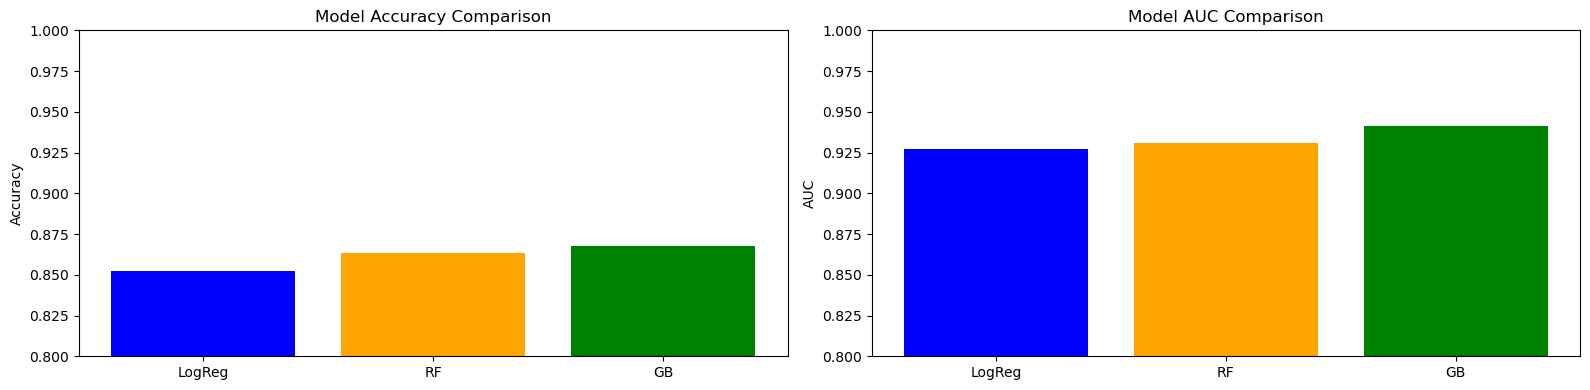

In [83]:
plt.figure(figsize=(16, 4))

# Set up different colors for each model
colors = ['blue', 'orange', 'green']

# Accuracy plot
plt.subplot(1, 2, 1)
plt.bar(['LogReg', 'RF', 'GB'], [logreg_accuracy, rf_accuracy, gb_accuracy], color=colors)
plt.ylim([0.8, 1])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# AUC plot
plt.subplot(1, 2, 2)
plt.bar(['LogReg', 'RF', 'GB'], [logreg_auc, rf_auc, gb_auc], color=colors)
plt.ylim([0.8, 1])
plt.ylabel('AUC')
plt.title('Model AUC Comparison')

plt.tight_layout()
plt.show()

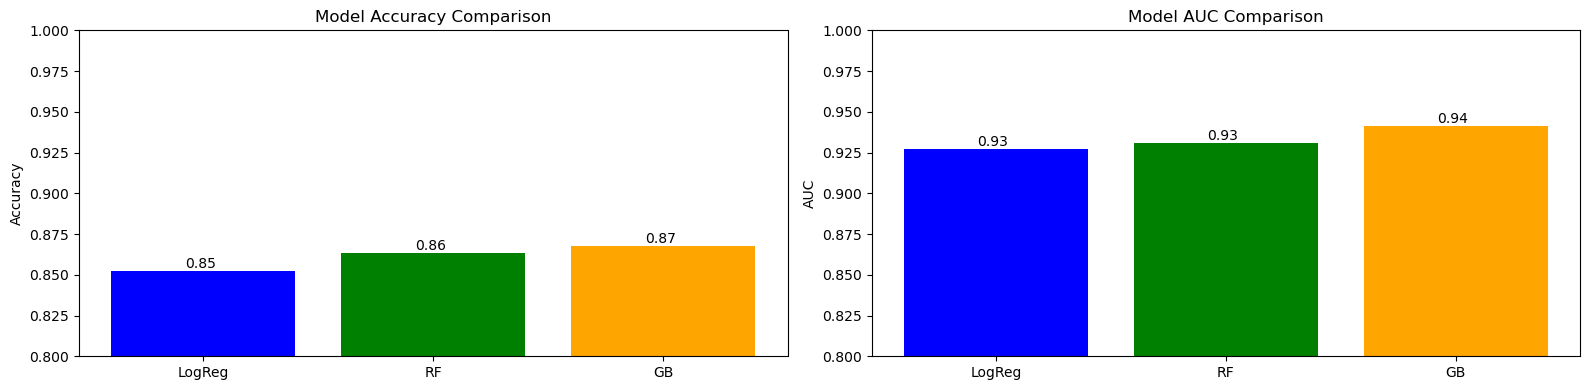

In [87]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['LogReg', 'RF', 'GB'], [logreg_accuracy, rf_accuracy, gb_accuracy], color=['blue', 'green', 'orange'])
plt.ylim([0.8, 1])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# AUC plot
plt.subplot(1, 2, 2)
bars = plt.bar(['LogReg', 'RF', 'GB'], [logreg_auc, rf_auc, gb_auc], color=['blue', 'green', 'orange'])
plt.ylim([0.8, 1])
plt.ylabel('AUC')
plt.title('Model AUC Comparison')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.5, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


### ROC Curves:

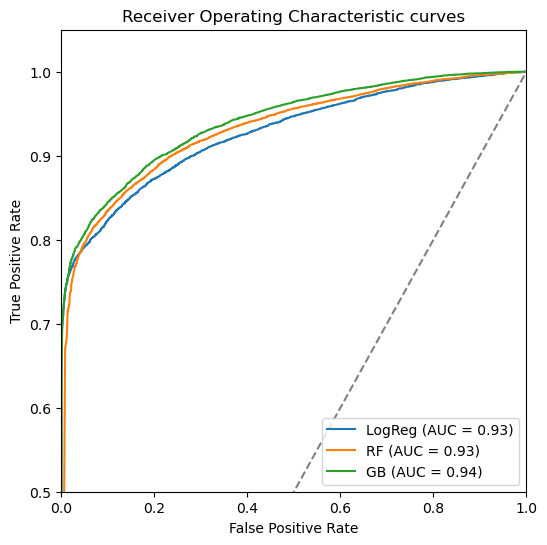

In [92]:
plt.figure(figsize=(6, 6))

plt.plot(logreg_fpr, logreg_tpr, label=f'LogReg (AUC = {logreg_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'RF (AUC = {rf_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'GB (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curves')
plt.legend(loc="lower right")

plt.show()

### Precision-Recall Curves:

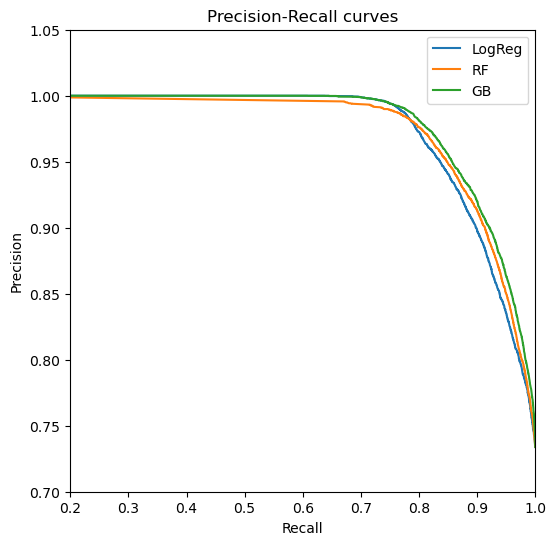

In [93]:
plt.figure(figsize=(6, 6))

plt.plot(logreg_recall, logreg_precision, label=f'LogReg')
plt.plot(rf_recall, rf_precision, label=f'RF')
plt.plot(gb_recall, gb_precision, label=f'GB')

plt.xlim([0.2, 1.0])
plt.ylim([0.7, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend()

plt.show()

## Using XGBoost to Further Augment the Gradient Boosting Scores

In [94]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('xgb', XGBClassifier())])

xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['mobileowner',
                                                   'receive_wages',
                                                   'receive_transfers',
                                                   'receive_pension', 'saved',
                                                   'pay_utilities',
                                                   'internetaccess']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['educ', 'inc_q',
                                                   'hdi_rank_2021']),
                                                 ('continuous',
                                                  StandardScaler(),
                                                  ['hdi_2021'])])),
                ('xgb',
                 XGBClassifier(base_score=N...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [95]:
xgb_predictions = xgb_pipeline.predict(X_test)
xgb_probabilities = xgb_pipeline.predict_proba(X_test)[:, 1]

In [96]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

print("XGBoost Accuracy: {:.2f}".format(xgb_accuracy))
print("XGBoost AUC: {:.2f}".format(xgb_auc))

XGBoost Accuracy: 0.88
XGBoost AUC: 0.95


In [97]:
print(metrics.classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6477
           1       0.93      0.91      0.92     17864

    accuracy                           0.88     24341
   macro avg       0.84      0.85      0.85     24341
weighted avg       0.88      0.88      0.88     24341



In [98]:
logloss = log_loss(y_test, xgb_probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.24701197805759725


In [99]:
# Calculate ROC curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)

# Calculate Precision-Recall curve
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probabilities)

### XGBoost ROC Curves

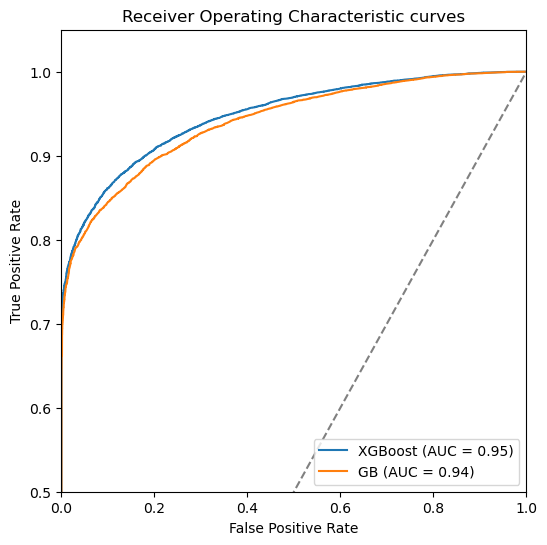

In [100]:
plt.figure(figsize=(6, 6))

plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'GB (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curves')
plt.legend(loc="lower right")

plt.show()

### Bar Plots Comparing XGBoost Accuracy and AUC-ROC:

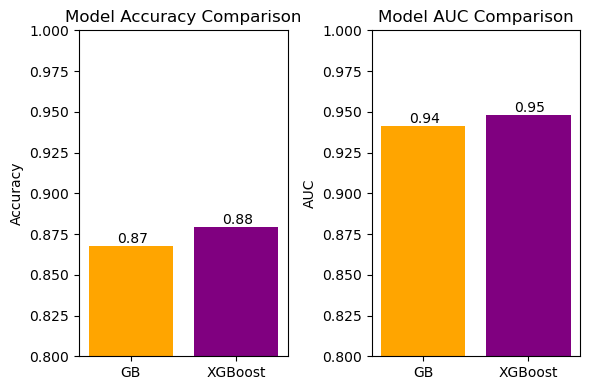

In [106]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
bars = plt.bar(['GB', 'XGBoost'], [gb_accuracy, xgb_accuracy], color=['orange', 'purple'])
plt.ylim([0.8, 1])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# AUC plot
plt.subplot(1, 2, 2)
bars = plt.bar(['GB', 'XGBoost'], [gb_auc, xgb_auc], color=['orange', 'purple'])
plt.ylim([0.8, 1])
plt.ylabel('AUC')
plt.title('Model AUC Comparison')

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()